In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# Lista de tonos de verde
tonos_verdes = [
    "#C8FFB4",  # Verde claro
    "#A3FF91",  # Verde claro-medio
    "#7FFF6E",  # Verde medio
    "#5BCF4F",  # Verde medio-intenso
    "#3FA33F",  # Verde intenso
    "#2E8330",  # Verde oscuro-intenso
    "#1F6420",  # Verde oscuro
    "#0F4710",  # Verde oscuro-medio
    "#002500"   # Verde muy oscuro
]

In [28]:
def actualitzar_bosc(bosc, humitat, estats):
    filas = len(bosc)
    columnas = len(bosc[0])
    
    estats_copia = estats.copy()
    
    for i in range(filas):
        for j in range(columnas):
            if estats_copia[i][j] == 1:  # Mirar si en el temps x s'esta cremant 
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        ni, nj = i + di, j + dj #Mirar tots els seus veins
                        if 0 <= ni < filas and 0 <= nj < columnas:
                            if humitat[ni][nj] > 0: # Si tenen humitat resta -1 humitat
                                humitat[ni][nj] -= 1
                                if humitat[ni][nj] == 0 and bosc[ni][nj] != 0: # Si té humitat 0 i té vegetació la casella es crema
                                    estats[ni][nj] = 1  
                            elif bosc[ni][nj] > 0 and humitat[ni][nj] == 0: # Si la humitat s'ha consumit i hi ha vegetació es crema (-1)
                                bosc[ni][nj] -= 1
                                if bosc[ni][nj] == 0: # Si ja no queda vegetació la casella s'ha cremat
                                    estats[ni][nj] = 2  
    
    return bosc, humitat, estats

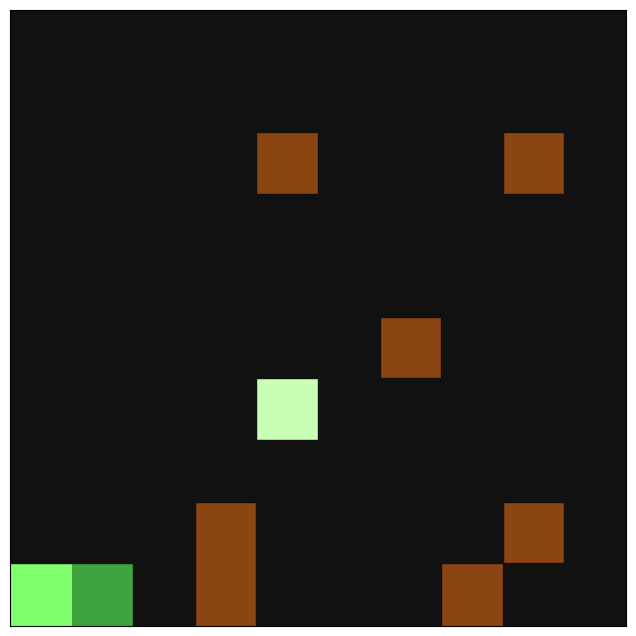

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython import display

def visualitzar(bosc, estats):
    n = len(bosc)
    m = len(bosc[0])
    

    display.clear_output(wait=True)
    plt.figure(figsize=(8, 8))
    
    # Pintar de verd les zones de vegatació segons la seva quantitat
    cmap_custom = ListedColormap(tonos_verdes)
    
    # Establir el color marró per a les caselles sense vegatació
    cmap_custom.set_under('#8B4513')  # Marrón oscuro para las áreas no boscosas
    
    # Pintar de marró les caselles sense vegetació
    bosc_colors = np.where(bosc == 0, 0.1, bosc)
    plt.imshow(bosc_colors, cmap=cmap_custom, vmin=0.5, vmax=10)
    
    plt.colorbar().remove()
    
    plt.xticks([])
    plt.yticks([])
    
    # Respresentar l'estat de les caselles
    for i in range(n):
        for j in range(m):
            if estats[i][j] == 1: # Si la casella s'esta cremant es pinta de vermell
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#FF2000'))  # Color entre rojo y naranja
                
            elif estats[i][j] == 2: # Si la casella esta cremada es pinta de gris fosc
                plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.52), 1, 1, fill=True, color='#111111'))  # Color entre gris y negro
    
    
    plt.show()
    plt.pause(0.5)  

# Generación de la matriz y las actualizaciones
np.random.seed(42)
n = 10  # Número de filas
m = 10  # Número de columnas
bosc = np.random.randint(0, 11, size=(n, m))
humitat = np.random.randint(0, 5, size=(n, m))
estats = np.zeros((n, m), dtype=int)
x_fire, y_fire = np.random.randint(0, n), np.random.randint(0, m)
humitat[x_fire][y_fire] = 0
estats[x_fire][y_fire] = 1

for i in range(25):
    visualitzar(bosc, estats)
    bosc, humitat, estats = actualitzar_bosc(bosc, humitat, estats)
